In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


#https://www.kaggle.com/itachi9604/disease-symptom-description-dataset

filename = "dataset.csv"
filename2 = "symptom_Description.csv"
filename3 = "symptom_precaution.csv"
filename4 = "Symptom-severity.csv"
data1 = pd.read_csv(filename)
data2 = pd.read_csv(filename2)
data3 = pd.read_csv(filename3)
data4 = pd.read_csv(filename4)



print(data1.shape)

data1["Symptom_1"]

(4920, 18)


0                    itching
1                  skin_rash
2                    itching
3                    itching
4                    itching
                ...         
4915                vomiting
4916               skin_rash
4917     burning_micturition
4918               skin_rash
4919               skin_rash
Name: Symptom_1, Length: 4920, dtype: object

In [2]:
cols = [i for i in data1.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [70]:
#Creating dataframe with all symptoms and the disease in the column label
tmp = pd.melt(data1.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add'] = 1
df = pd.pivot_table(tmp, values = 'add',index = 'index', columns = 'value')
df.insert(0,'label',data1['Disease'])
df = df.fillna(0)
df.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
ClassY = df['label']
ClassY

index
0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: label, Length: 4920, dtype: object

In [11]:
#Replacing all diseases with a value
disease = {'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}
df.replace({'label':disease},inplace = True)


In [22]:
X = df.drop("label",axis = 1)
y = df['label']

model=RandomForestClassifier(n_estimators=50)
model.fit(X,y)
estimator = model.estimators_[5]
#fold as 5
#cv = KFold(n_splits=5, shuffle=False)

In [20]:
score = cross_val_score(model, X, y, cv=cv)
print("Accuracy:",(sum(score)/5)*100)



Accuracy: 100.0


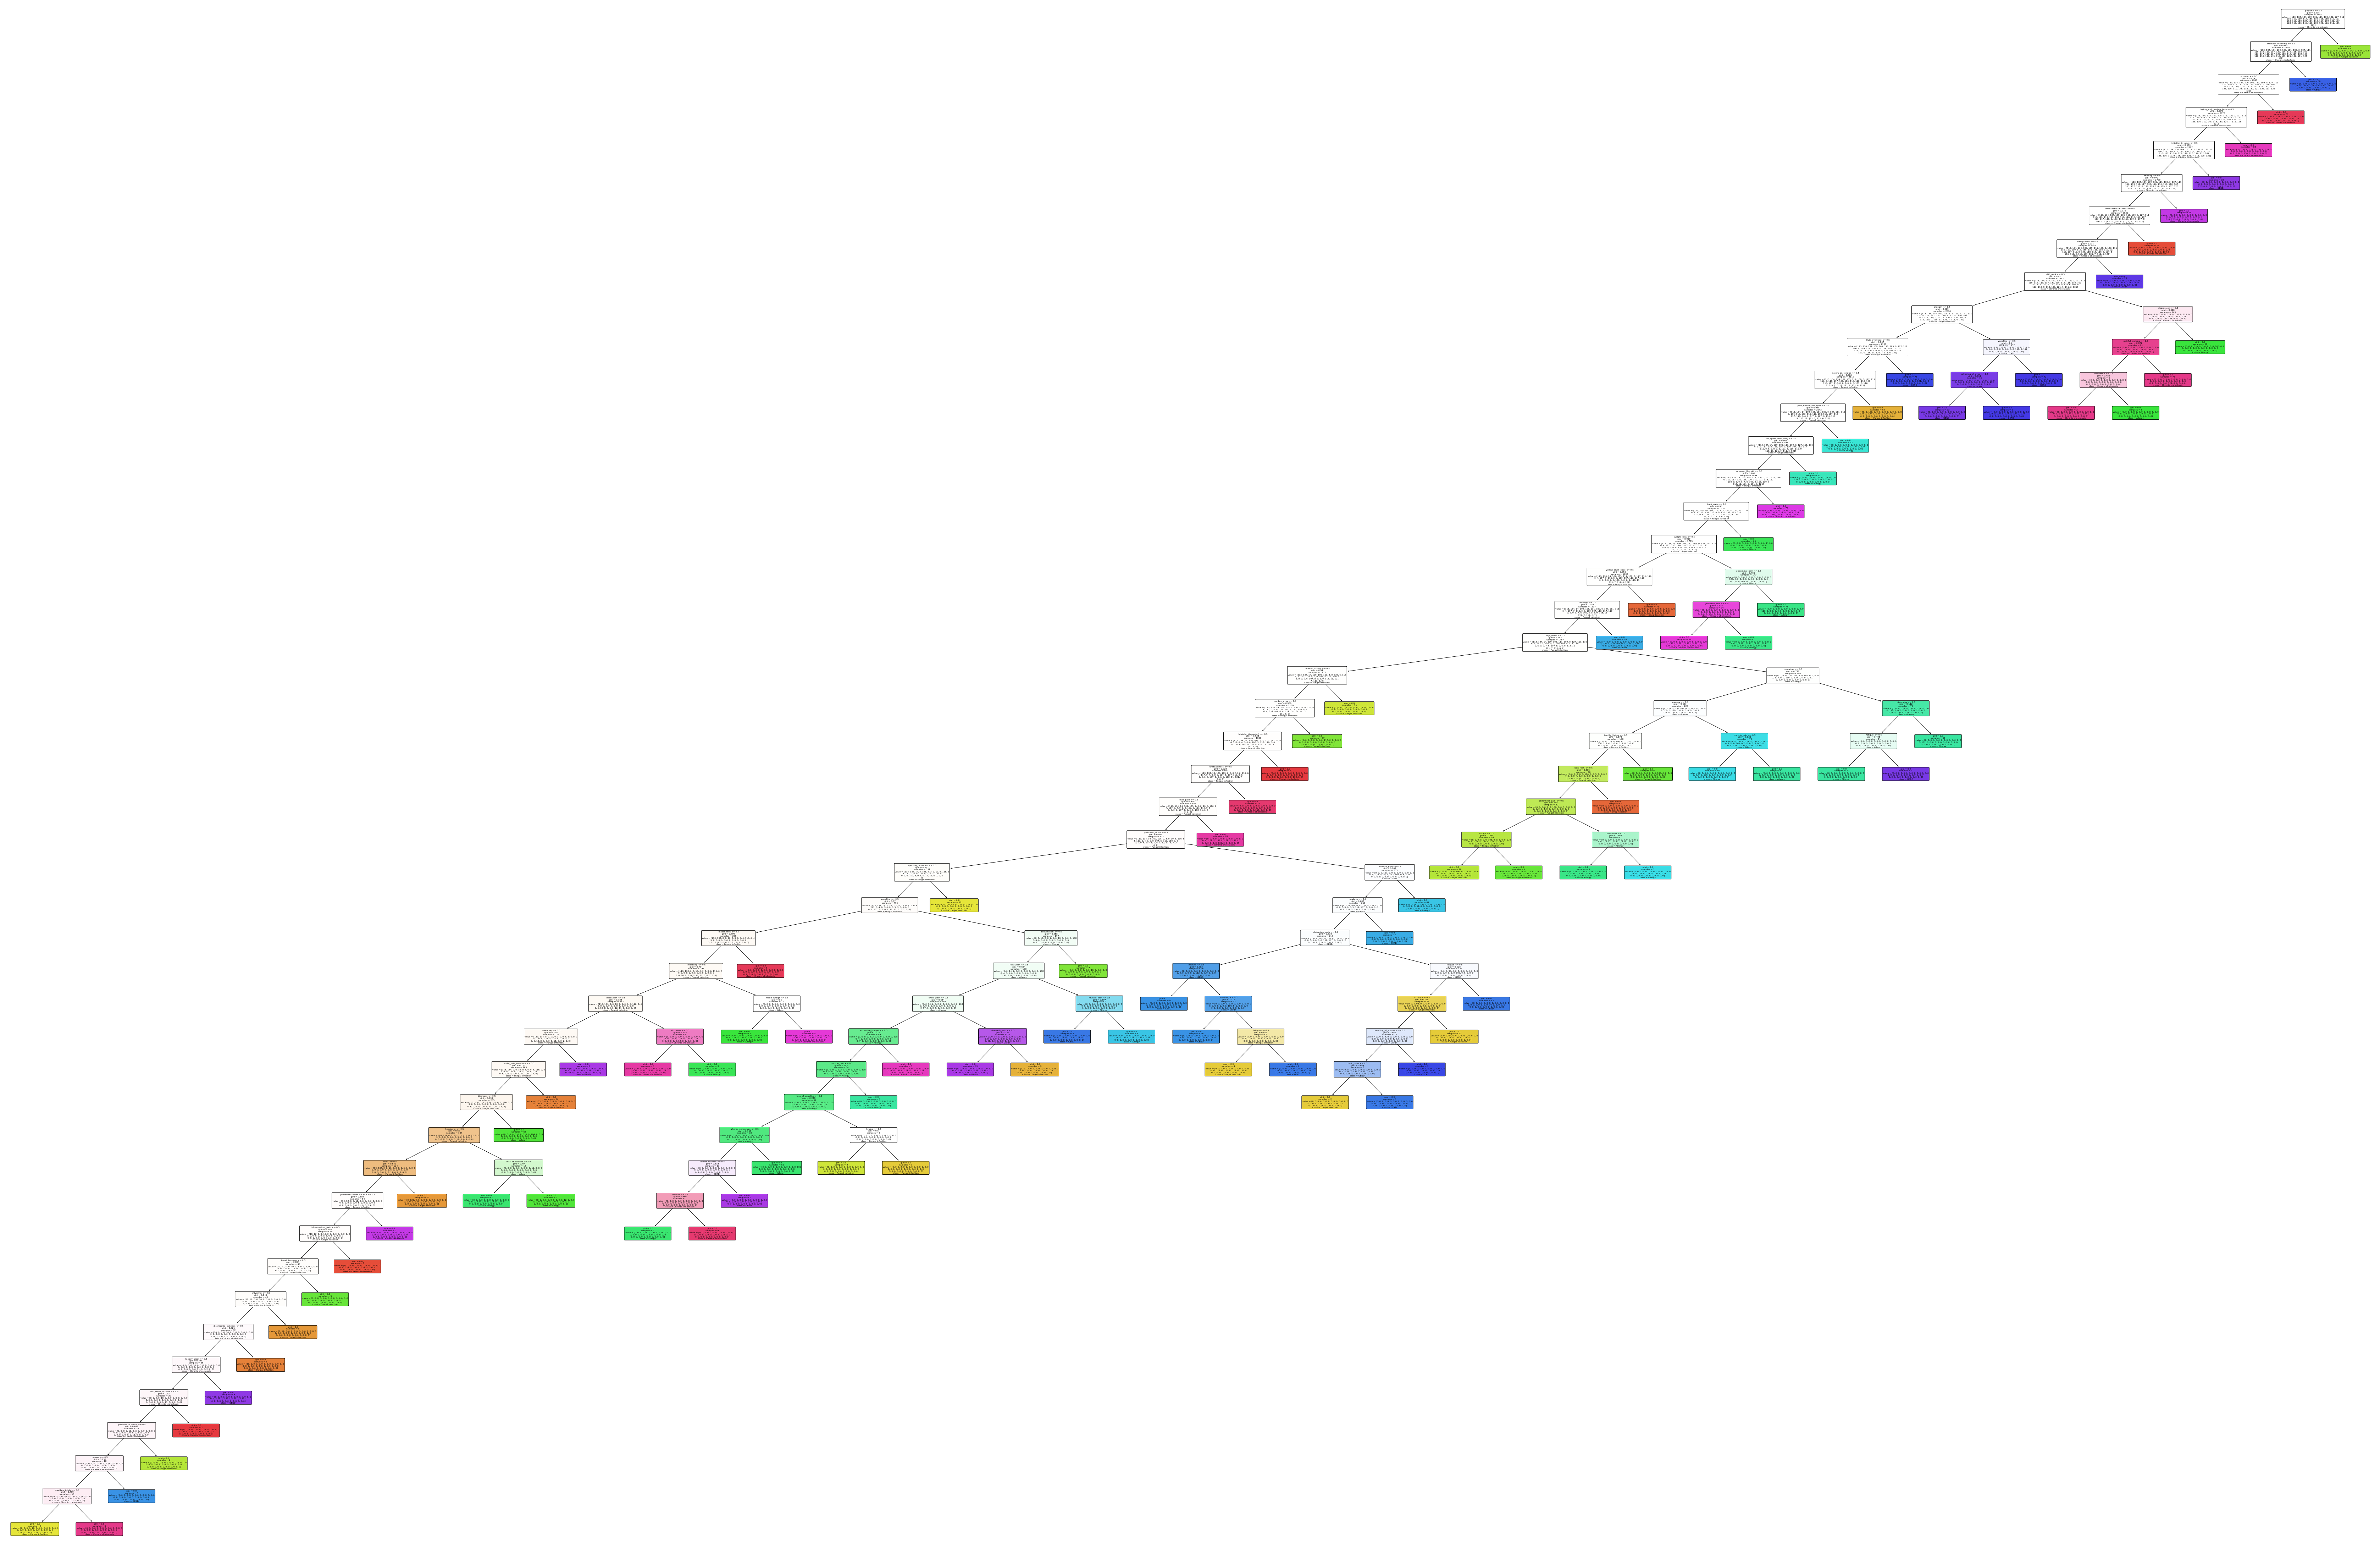

In [120]:
from sklearn.tree import plot_tree
#fig = plt.figure(figsize=(15, 10))
fig = plt.figure(figsize=(120, 80))
plot_tree(model.estimators_[0], 
          feature_names=X.columns,
          class_names=ClassY, 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('figure_name.png')